In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stan
import arviz as az
import nest_asyncio
nest_asyncio.apply()

In [3]:
# Simulate data 
N = 100 
alpha = 2.3
sigma = 2.
slope = 4. 
x = np.random.normal(size = N)
y = alpha + slope * x + sigma * np.random.normal(size = N)

<Axes: ylabel='Count'>

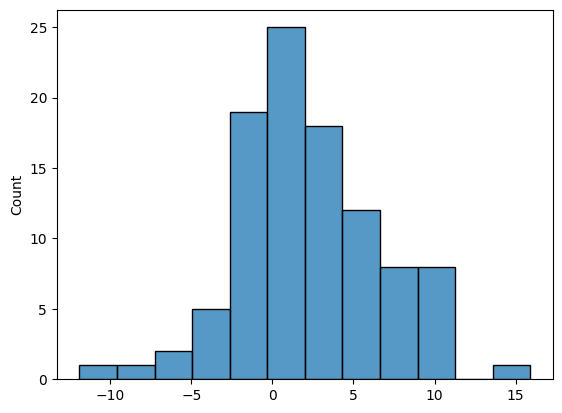

In [4]:
sns.histplot(y)

In [ ]:
# Create data dictionary
data_dict = {
   'x': x,
   'y': y,
   'N': N
}